In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [177]:
df=pd.read_csv('poly.csv')
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [178]:
df.columns

Index(['sno', 'Temperature', 'Pressure'], dtype='object')

In [179]:
df.shape

(6, 3)

In [180]:
df.drop('sno',axis=1,inplace=True)
df

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


Text(0, 0.5, 'Pressure')

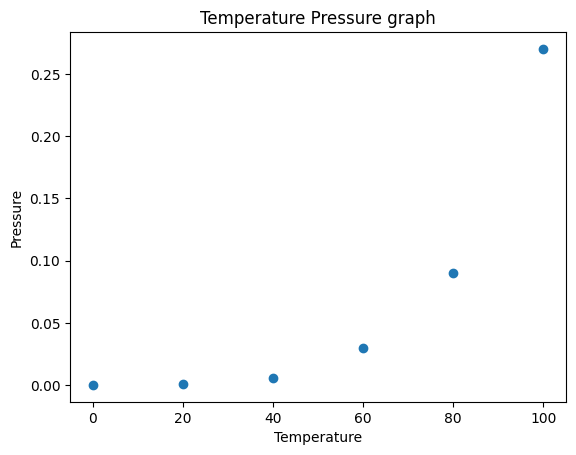

In [181]:
plt.scatter(df['Temperature'],df['Pressure'])
plt.title('Temperature Pressure graph')
plt.xlabel('Temperature')
plt.ylabel('Pressure')


In [182]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [183]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

In [184]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE=mean_absolute_percentage_error(y,y_pred)
MAPE

44.775078189300416

In [185]:
from sklearn.metrics import r2_score
score=r2_score(y,y_pred)
score

0.690349972603981

Text(0, 0.5, 'Pressure')

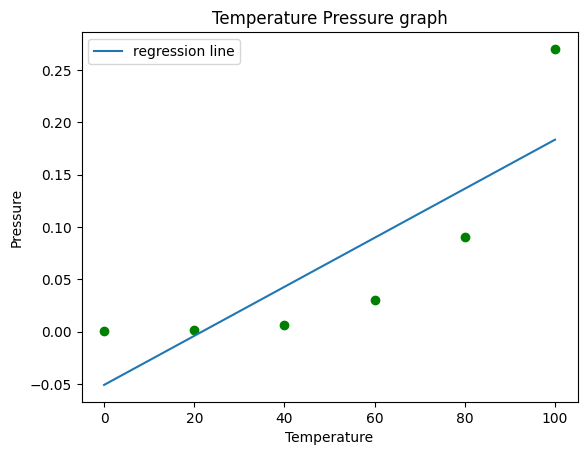

In [186]:
plt.scatter(x,y,color='g')
plt.plot(x,y_pred,label='regression line')
plt.legend()
plt.title('Temperature Pressure graph')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

In [187]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2) # hill exapand features from 1 to 3 
x_poly=poly.fit_transform(x)
x_poly

array([[1.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+00, 2.0e+01, 4.0e+02],
       [1.0e+00, 4.0e+01, 1.6e+03],
       [1.0e+00, 6.0e+01, 3.6e+03],
       [1.0e+00, 8.0e+01, 6.4e+03],
       [1.0e+00, 1.0e+02, 1.0e+04]])

In [188]:
model1=LinearRegression()
model1.fit(x_poly,y)
y_pred1=model1.predict(x_poly)
y_pred1

array([ 0.01555, -0.01731, -0.01032,  0.03652,  0.12321,  0.24975])

In [189]:
MAPE1=mean_absolute_percentage_error(y,y_pred1)
MAPE1

15.926055555558056

In [190]:
score1=r2_score(y,y_pred1)
score1

0.9568461098911795

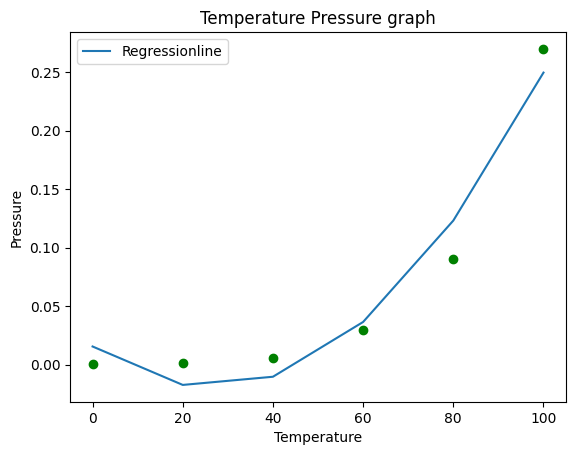

In [191]:
plt.scatter(x,y,color='g')
plt.plot(x,y_pred1,label='Regressionline')
plt.title('Temperature Pressure graph')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend()

In [192]:
df2=pd.DataFrame({'Actual Value':y,'Simple Regression':y_pred,'Polynomial Regression':y_pred1})
df2

,Actual Value,Simple Regression,Polynomial Regression
0,0.0002,-0.050867,0.01555
1,0.0012,-0.004027,-0.01731
2,0.0060,0.042813,-0.01032
3,0.0300,0.089653,0.03652
4,0.0900,0.136493,0.12321
5,0.2700,0.183333,0.24975
